<a href="https://colab.research.google.com/github/Deep-of-Machine/AI_Academy/blob/main/5_5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn
from torch.nn import functional as F
from torch import optim

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
train_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## 합성곱 층 예시

nn.Conv2d(in_ch, out_ch, ker_size) : 채널수가 in_ch인 입력 이미지를 채널수가 out_ch의 피처 맵으로 만들기 위해, 가로, 세로 길이가 ker_size인 필터를 생성

In [6]:
conv1 = nn.Conv2d( in_channels=1, out_channels=2, kernel_size=(3,3), stride=(1,1), padding=(0,0) )

In [9]:
conv1.weight

Parameter containing:
tensor([[[[ 0.1779,  0.3103,  0.0162],
          [ 0.2013,  0.1060,  0.1153],
          [-0.2371,  0.2319,  0.2982]]],


        [[[-0.2930, -0.1408, -0.2842],
          [ 0.3198, -0.3046, -0.2763],
          [ 0.0205, -0.0943,  0.0666]]]], requires_grad=True)

In [11]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3,3), stride=(1,1), padding=(0,0))

In [12]:
conv.weight.squeeze()

tensor([[-0.1221, -0.1514, -0.2646],
        [-0.2716,  0.0303,  0.0838],
        [ 0.1482, -0.0545, -0.0126]], grad_fn=<SqueezeBackward0>)

In [13]:
x = torch.rand((5,5))

In [14]:
print(x)

tensor([[0.4412, 0.7361, 0.8784, 0.6390, 0.8422],
        [0.7998, 0.2589, 0.1205, 0.5424, 0.2281],
        [0.0732, 0.8244, 0.7358, 0.1681, 0.8779],
        [0.8195, 0.3428, 0.8810, 0.5847, 0.2282],
        [0.8238, 0.7963, 0.4737, 0.0200, 0.4541]])


In [16]:
conv(x.view(1,1,5,5))

tensor([[[[-0.4135, -0.1063, -0.1083],
          [ 0.2165, -0.1586,  0.0443],
          [-0.1672,  0.0449, -0.2597]]]], grad_fn=<ThnnConv2DBackward>)

nn.MaxPool2d(ker_size, stride) : 필터의 폭과 높이가 ker_size 길이인 풀링 층을 스트라이드를 stride만큼 적용

In [17]:
pool = nn.MaxPool2d(kernel_size=(3,3), stride=(2,2))
print(pool)

MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)


In [18]:
pool(x.view(1,1,5,5))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[[[0.8784, 0.8784],
          [0.8810, 0.8810]]]])

In [48]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) 
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3) 
        self.pool = nn.MaxPool2d(2,2) 
        self.fc1 = nn.Linear(5*5*64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # (64, 8, 13, 13)
        x = self.pool(F.relu(self.conv2(x))) # (64, 16, 5, 5)
        x = self.pool(F.relu(self.conv3(x))) # (64, 16, 5, 5)
        x = x.view(-1, 16*5*5)               # (64, 16*5*5)
        x = F.relu(self.fc1(x))              # (64, 128)
        x = F.relu(self.fc2(x))                    # (64, 10)
        x = F.relu(self.fc3(x))              # (64, 128)
        out = self.fc4(x)                    # (64, 10)
        return out

model = MyNet().to(device)

In [49]:
model

MyNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

첫번째 합성곱 층의 필터들

In [ ]:
len(list(model.parameters()))

In [ ]:
list(model.parameters())[0].shape

학습하기 이전의 필터의 성분

In [ ]:
list(model.parameters())[0][0].shape

In [ ]:
list(model.parameters())[0][0].squeeze().shape

In [ ]:
first_filter = list(model.parameters())[0][0].squeeze()
print(first_filter)

In [27]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [50]:
epochs = 20

for epoch in range(epochs):
    running_loss = 0.0
    start_time = time.time()

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)

        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    end_time = time.time()

    print('Epoch : {}, Loss : {}, time : {}'.format(epoch + 1, running_loss/len(train_loader), end_time - start_time))

RuntimeError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
PATH = '/content/drive/MyDrive/day_5/mnist_cnn.pth'
torch.save(model.state_dict(), PATH)

학습 전과 후 필터의 성분 비교

In [35]:
print(list(model.parameters())[0][0].squeeze())

tensor([[-0.2474, -0.2485, -0.0149],
        [ 0.2604,  0.4681,  0.3536],
        [ 0.5838,  0.5306,  0.1325]], device='cuda:0',
       grad_fn=<SqueezeBackward0>)


## CNN의 성능 확인

In [29]:
for mini_batch in test_loader:
    first_batch = mini_batch
    break

inputs = first_batch[0]
labels = first_batch[1]
outputs = model(inputs.to(device))

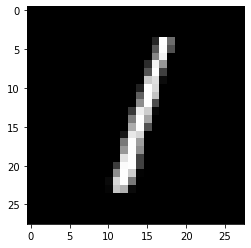

예측 : 1
라벨 : 1


In [30]:
sample_number = 2

plt.imshow(inputs[sample_number].squeeze().numpy(), cmap = 'gray')
plt.show()
print('예측 : {}'.format(torch.argmax(outputs[sample_number]).item()))
print('라벨 : {}'.format(labels[sample_number].item()))

In [31]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim = 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(total)
    print(100*correct / total)

10000
91.28


학습 가능한 파라미터 수 계산

In [34]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)

53866


직접 계산